# SHUBHAM SHARMA
## IIT BOMBAY

This code is for selective search output

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Importing packages
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
import selectivesearch
import cv2

In [5]:
# !pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=506794e25c704b57365bc3646e5331b253d9a2bdac0be852e7a6b9b9b8ee7605
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [0]:
path_drive = 'gdrive/My Drive/Project IE 643/IE-643 Data'
path_image = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-images-boxable-with-rotation.csv'
path_annotation = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-annotations-bbox.csv'
path_description = 'gdrive/My Drive/Project IE 643/IE-643 Data/class-descriptions-boxable.csv'
path_subcar_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subcar_img_url.csv'
path_subperson_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subperson_img_url.csv'
path_subphone_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subphone_img_url.csv'

In [8]:
car_images_boxable = pd.read_csv(path_subcar_url)
print(car_images_boxable.head())

person_images_boxable = pd.read_csv(path_subperson_url)
print(person_images_boxable.head())

phone_images_boxable = pd.read_csv(path_subphone_url)
print(phone_images_boxable.head())

annotations_bbox = pd.read_csv(path_annotation)
print(annotations_bbox.head())

class_description = pd.read_csv(path_description)
print(class_description.head())

   Unnamed: 0  ... Rotation
0           0  ...      0.0
1           1  ...      0.0
2           2  ...      0.0
3           3  ...      0.0
4           4  ...      0.0

[5 rows x 13 columns]
   Unnamed: 0  ... Rotation
0           0  ...      0.0
1           1  ...      NaN
2           2  ...      0.0
3           3  ...      0.0
4           4  ...      0.0

[5 rows x 13 columns]
   Unnamed: 0  ... Rotation
0           0  ...      0.0
1           1  ...      0.0
2           2  ...      0.0
3           3  ...      NaN
4           4  ...      NaN

[5 rows x 13 columns]
            ImageID  Source  LabelName  ...  IsGroupOf  IsDepiction  IsInside
0  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
1  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
2  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
3  000002b66c9c498e  xclick  /m/01g317  ...          0            0         0
4  000002b66c9c498e  xclick  /m/01g31

In [9]:
ind = 3
img_name = phone_images_boxable['ImageID'][ind]
img_url = phone_images_boxable['Thumbnail300KURL'][ind]
img = io.imread(img_url)
print('The shape of the image is: ', img.shape)

img_lbl, regions = selectivesearch.selective_search(img, scale=50, sigma=0.8, min_size=500)


The shape of the image is:  (640, 425, 3)


In [10]:
regions[:10]

[{'labels': [0.0], 'rect': (0, 0, 108, 172), 'size': 7964},
 {'labels': [1.0], 'rect': (18, 0, 227, 34), 'size': 2851},
 {'labels': [2.0], 'rect': (202, 0, 109, 36), 'size': 1183},
 {'labels': [3.0], 'rect': (294, 0, 130, 23), 'size': 1320},
 {'labels': [4.0], 'rect': (243, 8, 70, 70), 'size': 3066},
 {'labels': [5.0], 'rect': (305, 9, 119, 34), 'size': 2374},
 {'labels': [6.0], 'rect': (37, 10, 179, 52), 'size': 3380},
 {'labels': [7.0], 'rect': (161, 13, 87, 131), 'size': 2736},
 {'labels': [8.0], 'rect': (312, 20, 97, 97), 'size': 2875},
 {'labels': [9.0], 'rect': (51, 25, 147, 41), 'size': 2460}]

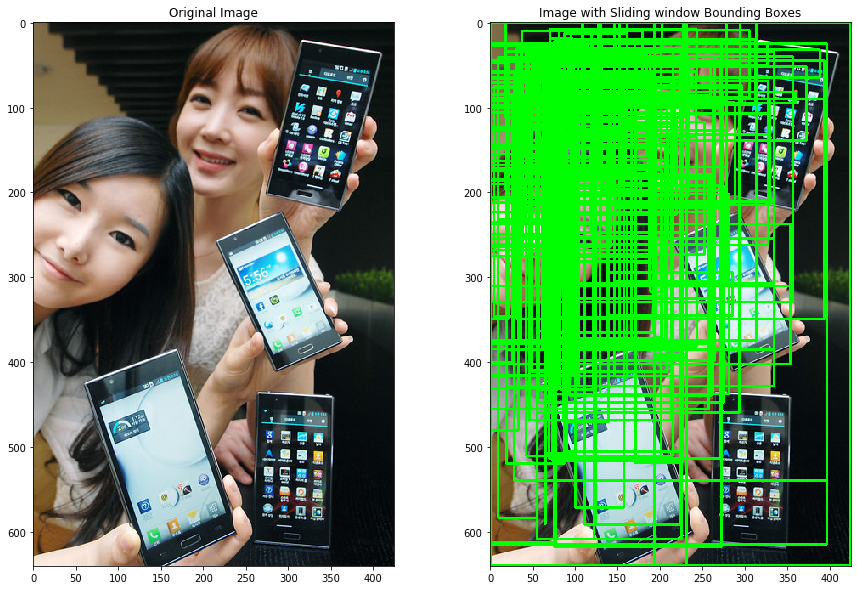

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_bbox = img.copy()
for i in range(len(regions)):
    (xmin,ymin,xmax,ymax) = regions[i]['rect']
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
plt.subplot(1,2,2)
plt.title('Image with Sliding window Bounding Boxes')
plt.imshow(img_bbox)